## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import glob

import warnings
warnings.filterwarnings('ignore')

## Creating DataFrame of the traffic sign from csv file

In [2]:
classes = pd.read_csv("../artifacts/data/labels.csv")
classes

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [3]:
# How many images in each folder
import os

# Walk through 10 percent data directory and list # of files
for dirpath, dirnames, filenames in os.walk("../artifacts/data/images"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in ../artifacts/data/images
There are 58 directories and 0 images in ../artifacts/data/images\TEST
There are 0 directories and 14 images in ../artifacts/data/images\TEST\0
There are 0 directories and 12 images in ../artifacts/data/images\TEST\1
There are 0 directories and 60 images in ../artifacts/data/images\TEST\10
There are 0 directories and 130 images in ../artifacts/data/images\TEST\11
There are 0 directories and 22 images in ../artifacts/data/images\TEST\12
There are 0 directories and 92 images in ../artifacts/data/images\TEST\13
There are 0 directories and 12 images in ../artifacts/data/images\TEST\14
There are 0 directories and 36 images in ../artifacts/data/images\TEST\15
There are 0 directories and 76 images in ../artifacts/data/images\TEST\16
There are 0 directories and 84 images in ../artifacts/data/images\TEST\17
There are 0 directories and 0 images in ../artifacts/data/images\TEST\18
There are 0 directories and 0 images in ../artifacts

## Extracting Train and Test data into npy files

In [4]:
# function to read and resize images, get labels and store them into np array
def get_image_label_resize(label, filelist, dim = (32, 32)):
    x = np.array([cv2.resize(cv2.imread(fname), dim, interpolation = cv2.INTER_AREA) for fname in filelist])
    y = np.array([label] * len(filelist))
        
    #print('{} examples loaded for label {}'.format(x.shape[0], label))
    return (x, y)    
    
# data for label 0
# filelist = glob.glob('../artifacts/data/images/TRAIN/'+'0'+'/*.png')
# trainx, trainy = get_image_label_resize(0, filelist)

In [5]:
# # go throgh all others labels and store images into np array
# for label in range(1, len(classes)):
#     filelist = glob.glob('../artifacts/data/images/TRAIN/'+str(label)+'/*.png')
#     x, y = get_image_label_resize(label, filelist)
#     trainx = np.concatenate((trainx ,x))
#     trainy = np.concatenate((trainy ,y))

In [6]:
# # save data into a pickle to later use
# trainx.dump('../artifacts/data/trainx.npy')
# trainy.dump('../artifacts/data/trainy.npy')

In [7]:
# Now let's do the same for test data.
# filelist = glob.glob('../artifacts/data/images/TEST/'+'0'+'/*.png')
# testx, testy = get_image_label_resize(0, filelist)

# for label in range(1, len(classes)):
#     filelist = glob.glob('../artifacts/data/images/TEST/'+str(label)+'/*.png')
#     if len(filelist) > 0:
#         x, y = get_image_label_resize(label, filelist)
#         print(label, x.shape, y.shape)
#         testx = np.concatenate((testx ,x))
#         testy = np.concatenate((testy ,y))

# # # save data into a pickle to later use
# testx.dump('../artifacts/data/testx.npy')
# testy.dump('../artifacts/data/testy.npy')

In [8]:
# load data from pickle
trainx = np.load('../artifacts/data/trainx.npy', allow_pickle=True)
trainy = np.load('../artifacts/data/trainy.npy', allow_pickle=True)
X_test = np.load('../artifacts/data/testx.npy', allow_pickle=True)
y_test = np.load('../artifacts/data/testy.npy', allow_pickle=True)

In [9]:
# shuffle training data and split them into training and validation
indices = np.random.permutation(trainx.shape[0])
# 20% to val
split_idx = int(trainx.shape[0] * 0.8)
train_idx, val_idx = indices[:split_idx], indices[split_idx:]
X_train, X_validation = trainx[train_idx,:], trainx[val_idx,:]
y_train, y_validation = trainy[train_idx], trainy[val_idx]

In [10]:
# get overall stat of the whole dataset
n_train = X_train.shape[0]
n_validation = X_validation.shape[0]
n_test = X_test.shape[0]
image_shape = X_train[0].shape
n_classes = len(np.unique(y_train))
print("There are {} training examples ".format(n_train))
print("There are {} validation examples".format(n_validation))
print("There are {} testing examples".format(n_test))
print("Image data shape is {}".format(image_shape))
print("There are {} classes".format(n_classes))

There are 3336 training examples 
There are 834 validation examples
There are 2352 testing examples
Image data shape is (32, 32, 3)
There are 58 classes


In [11]:
# convert the images to grayscale
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gry = np.sum(X_validation/3, axis=3, keepdims=True)
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

# Normalize data
X_train_normalized_gry = (X_train_gry-128)/128
X_validation_normalized_gry = (X_validation_gry-128)/128
X_test_normalized_gry = (X_test_gry-128)/128

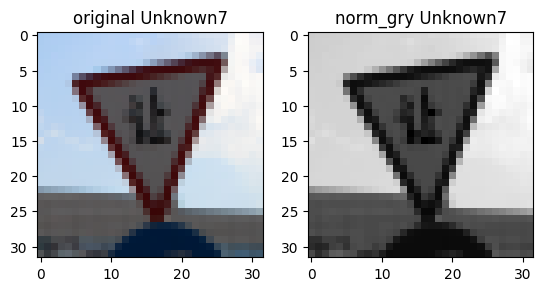

In [12]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

# pick an image, display the original and the normalized gray image
index = np.random.randint(0, n_train)
fig, ax = plt.subplots(1,2)
ax[0].set_title('original ' + classes.loc[classes['ClassId'] == y_train[index], 'Name'].values[0])
ax[0].imshow(cv2.cvtColor(X_train[index], cv2.COLOR_BGR2RGB))

ax[1].set_title('norm_gry ' + classes.loc[classes['ClassId'] == y_train[index], 'Name'].values[0])
ax[1].imshow(X_train_normalized_gry[index].squeeze(), cmap='gray')

In [13]:
# update the train, val and test data with normalized gray images
X_train = X_train_normalized_gry
X_validation = X_validation_normalized_gry
X_test = X_test_normalized_gry

## Model Training

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
# Conv 32x32x1 => 28x28x6.
model.add(layers.Conv2D(filters = 6, kernel_size = (5, 5), strides=(1, 1), padding='valid', 
                        activation='relu', data_format = 'channels_last', input_shape = (32, 32, 1)))
# Maxpool 28x28x6 => 14x14x6
model.add(layers.MaxPooling2D((2, 2)))
# Conv 14x14x6 => 10x10x16
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
# Maxpool 10x10x16 => 5x5x16
model.add(layers.MaxPooling2D((2, 2)))
# Flatten 5x5x16 => 400
model.add(layers.Flatten())
# Fully connected 400 => 120
model.add(layers.Dense(120, activation='relu'))
# Fully connected 120 => 84
model.add(layers.Dense(84, activation='relu'))
# Dropout
model.add(layers.Dropout(0.2))
# Fully connected, output layer 84 => 43
model.add(layers.Dense(len(classes), activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [16]:
# specify optimizer, loss function and metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# training batch_size=128, epochs=10
history = model.fit(X_train, y_train, batch_size=128, epochs=20, 
                    validation_data=(X_validation, y_validation))

Epoch 1/20
27/27 [==============================] - 1s 19ms/step - loss: 3.7844 - accuracy: 0.1142 - val_loss: 3.2869 - val_accuracy: 0.2566
Epoch 2/20
27/27 [==============================] - 0s 16ms/step - loss: 3.0076 - accuracy: 0.2758 - val_loss: 2.4568 - val_accuracy: 0.4089
Epoch 3/20
27/27 [==============================] - 0s 16ms/step - loss: 2.2945 - accuracy: 0.4385 - val_loss: 1.8110 - val_accuracy: 0.5480
Epoch 4/20
27/27 [==============================] - 0s 15ms/step - loss: 1.7195 - accuracy: 0.5486 - val_loss: 1.3192 - val_accuracy: 0.6583
Epoch 5/20
27/27 [==============================] - 0s 15ms/step - loss: 1.3334 - accuracy: 0.6472 - val_loss: 1.0220 - val_accuracy: 0.7386
Epoch 6/20
27/27 [==============================] - 0s 15ms/step - loss: 1.0659 - accuracy: 0.7068 - val_loss: 0.8130 - val_accuracy: 0.7794
Epoch 7/20
27/27 [==============================] - 0s 16ms/step - loss: 0.9037 - accuracy: 0.7455 - val_loss: 0.7268 - val_accuracy: 0.7866
Epoch 8/20
27

## Model Evaluation

In [17]:
# Let's create a function to plot our loss curves
# Note: You could put this function into a script called "helper.py" and import it when you need it....
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """
    Returns separate loss curves for training & validation curves
    Args:
        history: TensorFlow History object
    Returns:
        Plots of training/validation loss and accuracy metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    #Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    #Plot Accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend() 

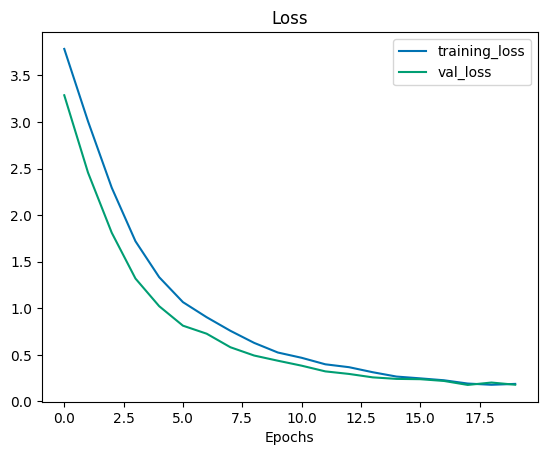

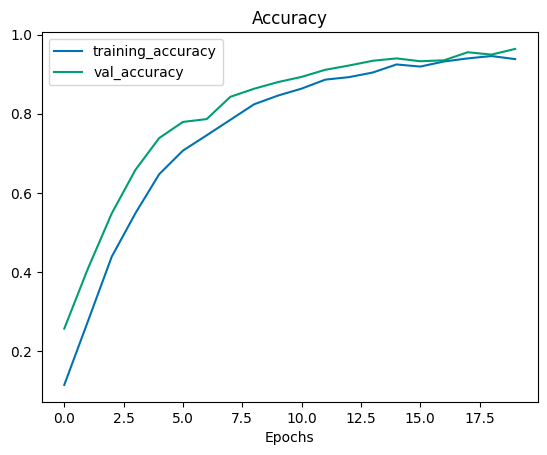

In [18]:
plot_loss_curves(history)

In [19]:
model.evaluate(x=X_test, y=y_test)

74/74 [==============================] - 0s 2ms/step - loss: 2.2018 - accuracy: 0.5774


[2.2018043994903564, 0.5773809552192688]

## Prediction

1/1 [==============================] - 0s 13ms/step


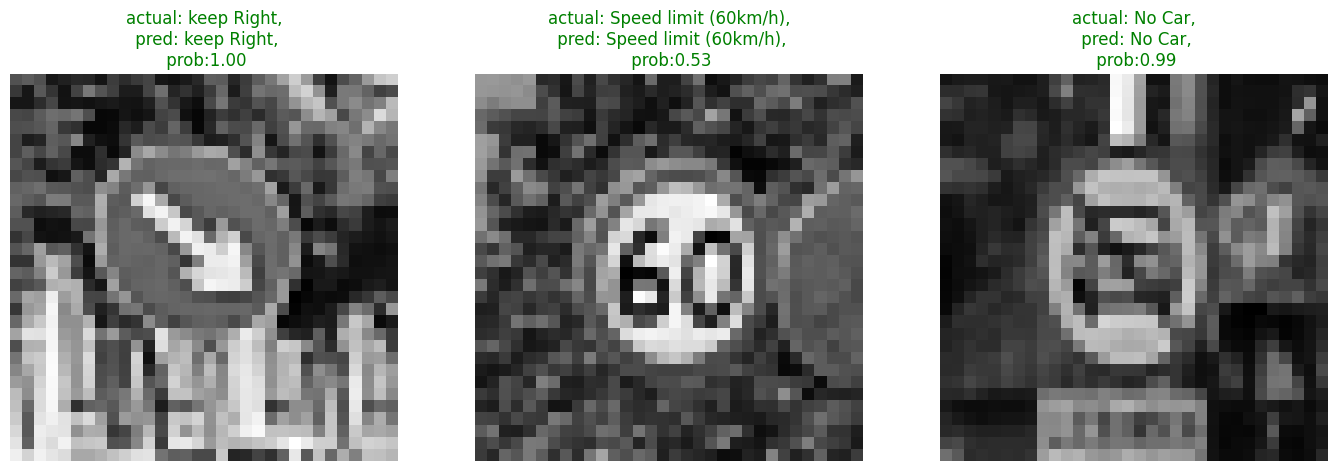

In [26]:
plt.figure(figsize=(17, 10))
for i in range(3):
    # Choose a random image from a random class
    index = np.random.randint(0, n_test)
    img = X_test[index]
    class_name = classes['Name'][y_test[index]]
    
    # Make predictions
    
    pred_prob = model.predict(np.array([img])) # Get prediction probabilities array 
    pred_id = classes['Name'][pred_prob.argmax()] # Get highest prediction probability & match it to class names list
    
    # Plot the images
    plt.subplot(1, 3, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    if class_name == pred_id: # if matches, make text green else red
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"actual: {class_name},\n pred: {pred_id},\n prob:{pred_prob.max():.2f}", c=title_color)
    plt.axis(False)

## Pickling model file

In [21]:
import pickle

In [22]:
# Store model into a pickle file in artifacts
pickle.dump(model, open('../artifacts/model.pkl', 'wb'))

In [24]:
# Load the pickled file to check if it works as expected
pickled_model = pickle.load(open('../artifacts/model.pkl', 'rb'))
pickled_model.evaluate(x=X_test, y=y_test)

74/74 [==============================] - 0s 2ms/step - loss: 2.2018 - accuracy: 0.5774


[2.2018043994903564, 0.5773809552192688]